# Data Analytics Challenge-9DTAT/Turma 2

Olá  Estudante!
Seja muito bem-vindo ao seu desafio de Data Analytics!

Seu desafio está em resolver o seguinte problema:

Você enquanto analista de dados de uma empresa, recebeu a missão de fazer uma análise exploratória (EDA) para que você gerasse insights relevantes na industria automobilística.

Como treino, você recebeu o [Auto MPG Data Set](https://drive.google.com/drive/folders/101vPIyG0u4FVj2Ndw1fXFiNvaqDhZpfk) com informações relevantes do consumo de milhas por galão de determinados automóveis.

Confira a [descrição das colunas do dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names).

Através desses dados, você terá que responder 20 perguntas de múltipla escolha abaixo, que envolvem : análise exploratória, programação e estatística.

OBS: Nem todas as perguntas são sobre dataset em si, pode ocorrer questões mais teóricas envolvendo conceitos fundamentais de análise exploratória, programação e estatística

In [ ]:
import pandas as pd
import numpy as np

## PERGUNTA 3

Se quisermos carregar o dataset via python, precisaremos da biblioteca "pandas". Qual a sintaxe correta para essa ação?

> RESPOSTA CORRETA: `pd.read_csv('auto-mpg-original.csv', sep = ' ; ')`

In [ ]:
df = pd.read_csv('/content/auto-mpg-original.csv', sep=';', decimal=',')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,"18,00",8.0,"307,00",130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,"15,00",8.0,"350,00",165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,"18,00",8.0,"318,00",150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,"16,00",8.0,"304,00",150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,"17,00",8.0,"302,00",140.0,3449.0,10.5,70.0,1.0,ford torino
5,"15,00",8.0,"429,00",198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,"14,00",8.0,"454,00",220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,"14,00",8.0,"440,00",215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,"14,00",8.0,"455,00",225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,"15,00",8.0,"390,00",190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


## PERGUNTA 1

Qual a dimensão do dataset inicialmente em (linhas, colunas)?

> RESPOSTA CORRETA: `(406,9)`

In [ ]:
df.shape

(406, 9)

## PERGUNTA 2

Em uma análise de dados, é muito comum fazermos as limpezas dos valores nulos para que consigamos analisar principalmente dados numéricos, onde podemos substituir os valores nulos por algum valor que deixe os dados mais próximos da realidade, ou simplesmente excluir as linhas onde eles estão. Se optarmos excluir as linhas com valores nulos em qualquer coluna para que possamos, nosso dataset passará a ter quantas linhas?

> RESPOSTA CORRETA: `392`

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    object 
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    object 
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    float64
 7   origin        392 non-null    float64
 8   car name      392 non-null    object 
dtypes: float64(6), object(3)
memory usage: 30.6+ KB


## PERGUNTA 9

Qual a função nativa do pandas que modifica o tipo de dado um uma coluna do dataframe?

> RESPOSTA CORRETA: `astype()`

In [ ]:
df['mpg'] = df['mpg'].str.replace(',', '.').astype('float')

In [ ]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,"307,00",130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,"350,00",165.0,3693.0,11.5,70.0,1.0,buick skylark 320


## PERGUNTA 4

Olhando para o ano de fabricação, qual ano corresponde a carros com maior economia de milhas por galão (mpg) ?

> RESPOSTA CORRETA: `80`

In [ ]:
mpg_por_ano_modelo = df.groupby('model year')['mpg'].mean().sort_values(ascending=False)
mpg_por_ano_modelo

,mpg
model year,
80.0,33.803704
82.0,32.000000
81.0,30.185714
79.0,25.093103
78.0,24.061111
77.0,23.375000
74.0,22.769231
76.0,21.573529
71.0,21.111111


## PERGUNTA 5

No intervalo interquartil, diga o valor para o 3º quartil da coluna "horsepower"

> RESPOSTA CORRETA: `650`

In [ ]:
df.describe()

,mpg,cylinders,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,509.354592,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,334.078508,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,100.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,147.250000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,650.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,840.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,980.000000,5140.000000,24.800000,82.000000,3.000000


OU a resposta bonitinha que não consegui pensar na hora:

In [ ]:
df['horsepower'].quantile(0.75)

np.float64(840.0)

## PERGUNTA 6

Após a limpeza dos dados(dropar as linhas com valores nulos), quantos tipos de carros distintos nós temos em nossa base?

> RESPOSTA CORRETA: `301`

In [ ]:
df['car name'].nunique()

301

## PERGUNTA 7

Qual o desvio padrão aproximado da coluna "mpg"?

> RESPOSTA CORRETA: `7.8`

In [ ]:
df.describe()

,mpg,cylinders,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,509.354592,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,334.078508,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,100.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,147.250000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,650.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,840.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,980.000000,5140.000000,24.800000,82.000000,3.000000


OU:

In [ ]:
df['mpg'].std()

7.805007486571799

## PERGUNTA 8

Qual o valor da correlação entre as colunas "cylinders" e "weight"? Obs: Considere o coeficiente de correlação de Pearson

> RESPOSTA CORRETA: `0.9`

<Axes: >

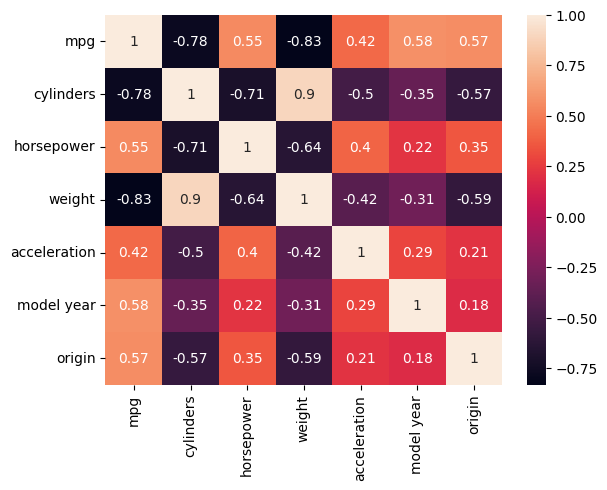

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True)

OU se quiser fazer bonitinho:

In [ ]:
df['cylinders'].corr(df['weight'], method='pearson')

np.float64(0.8975273403408162)

## PERGUNTA 10

O z-score é uma métrica estatística fundamental para análise de dados, e sua equação é dada abaixo. Qual o significado do z-score?

$$
z = \frac{x - \mu}{\sigma}
$$


> RESPOSTA CORRETA: `Verificar o quão distante em desvios padrões os dados estão em relação à média.`



## PERGUNTA 11

Quando fazemos a correlação da variáveis, os valores negativos representam o que?

> RESPOSTA CORRETA: `A relação das variáveis são inversamente proporcionais`

Vide pergunta 8

## PERGUNTA 12

Quando montamos um gráfico para comparar qual o ano dos carros apresentaram uma maior economia no mpg, qual ano mostrou o maior desempenho?

> RESPOSTA CORRETA: `80`

Vide pergunta 4

<Axes: xlabel='model year', ylabel='mpg'>

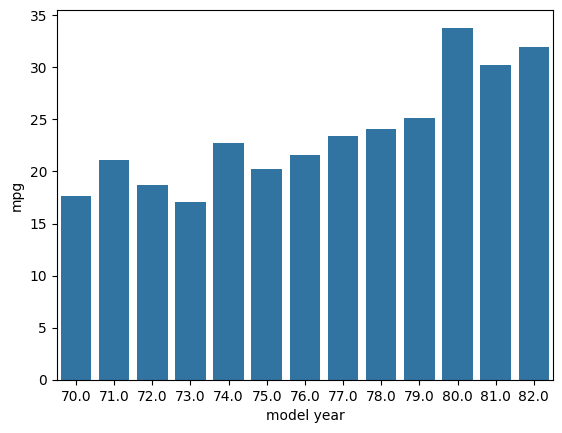

In [ ]:
sns.barplot(mpg_por_ano_modelo)

## PERGUNTA 13

Os valores nulos dentro de um conjuto de dados sempre atrapalham na visualização e na compreensão das nossas análises. Qual função do pandas identifica que há dados nulos no dataset?

> RESPOSTA CORRETA: `.isnull()`

In [ ]:
# True é nulo, False é não-nulo
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
401,False,False,False,False,False,False,False,False,False
402,False,False,False,False,False,False,False,False,False
403,False,False,False,False,False,False,False,False,False
404,False,False,False,False,False,False,False,False,False


## PERGUNTA 14

Muitas das vezes quando precisamos entender a tendencia de como está sendo a evolução dos carros analisados, utilizamos um determinado tipo de gráfico. Qual gráfico utilizamos?

> RESPOSTA CORRETA: `Linha`

## PERGUNTA 15

Observando o gráfico abaixo, qual das cilindradas há a maior economia de combustível?

> RESPOSTA CORRETA: `4`

<Axes: xlabel='cylinders', ylabel='mpg'>

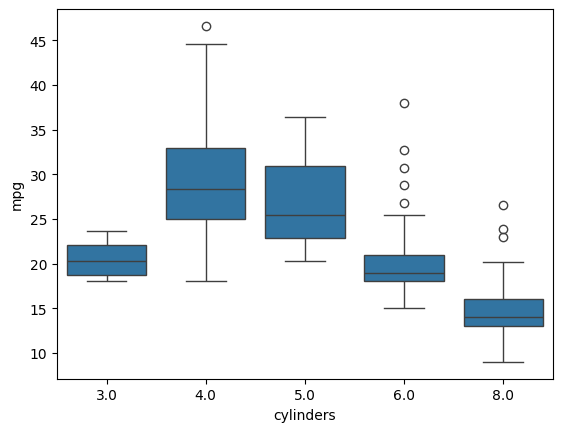

In [ ]:
sns.boxplot(x='cylinders', y='mpg', data=df)

## PERGUNTA 16

Olhando para o código em python, o que está sendo codado em nosso notebook?

RESPOSTA: `Construção de gráficos de barras`

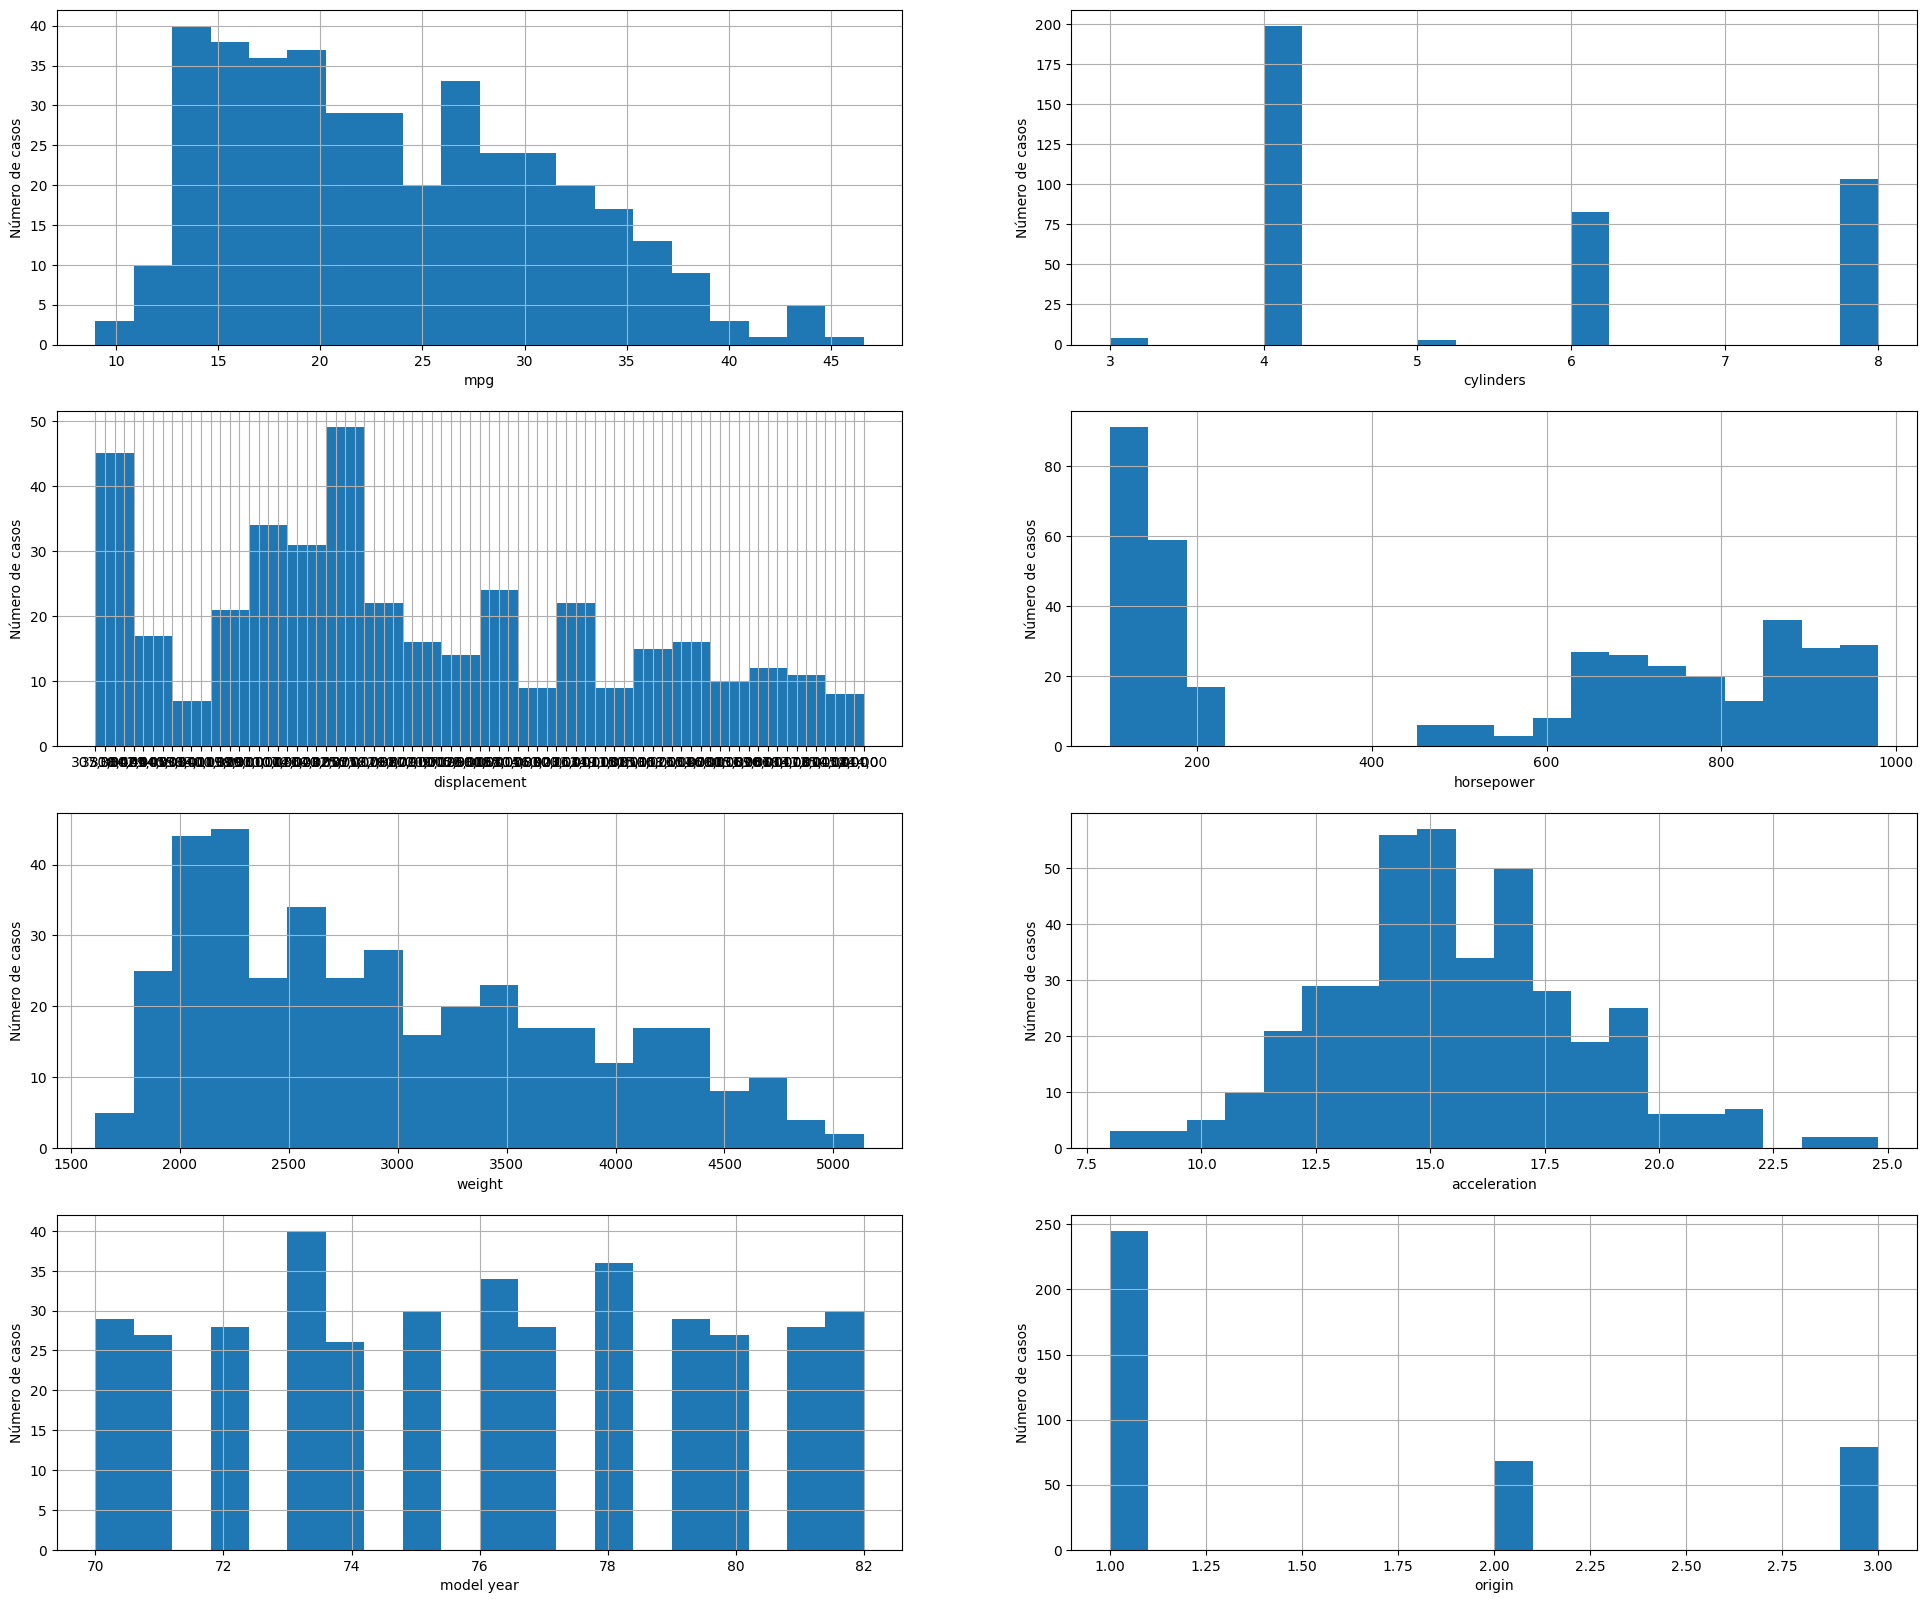

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 1)
fig = df['mpg'].hist(bins=20)
fig.set_xlabel('mpg')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 2)
fig = df['cylinders'].hist(bins=20)
fig.set_xlabel('cylinders')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 3)
fig = df['displacement'].hist(bins=20)
fig.set_xlabel('displacement')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 4)
fig = df['horsepower'].hist(bins=20)
fig.set_xlabel('horsepower')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 5)
fig = df['weight'].hist(bins=20)
fig.set_xlabel('weight')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 6)
fig = df['acceleration'].hist(bins=20)
fig.set_xlabel('acceleration')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 7)
fig = df['model year'].hist(bins=20)
fig.set_xlabel('model year')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 8)
fig = df['origin'].hist(bins=20)
fig.set_xlabel('origin')
fig.set_ylabel('Número de casos')

plt.show()

## PERGUNTA 17

No python, se quiser colocar uma coluna a mais para dentro do dataframe e adicionar o nome do país nesta coluna, como fazer?

RESPOSTA CORRETA: `df['cod_pais'] = df.origin.replace([1,2,3],['EUA','Europa','Japão'])`

In [ ]:
df['cod_pais'] = df.origin.replace([1,2,3],['EUA','Europa','Japão'])

df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,cod_pais
0,18.0,8.0,"307,00",130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,EUA


## PERGUNTA 18

Qual a função nativa do pandas que faz a contagem distinta de valores em uma coluna ou no dataframe todo?

> RESPOSTA CORRETA: `value_counts()`

Confira a [documentação do Pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

## PERGUNTA 19

Dentro do nosso dataset, queremos saber quantos carros temos e iremos analisar. Quantos carros temos no nosso conjunto de dados?

> RESPOSTA CORRETA: `312`????

In [ ]:
df.shape

(392, 10)

In [ ]:
df['car name'].value_counts().sum()

np.int64(392)

## PERGUNTA 20

Qual a função do pandas que utilizamos para evitar que o índice de um dataframe vire uma coluna após uma modificação?

> RESPOSTA CORRETA: `reset_index(drop=True)`

In [ ]:
df.reset_index(drop=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,cod_pais
0,18.0,8.0,"307,00",130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,EUA
1,15.0,8.0,"350,00",165.0,3693.0,11.5,70.0,1.0,buick skylark 320,EUA
2,18.0,8.0,"318,00",150.0,3436.0,11.0,70.0,1.0,plymouth satellite,EUA
3,16.0,8.0,"304,00",150.0,3433.0,12.0,70.0,1.0,amc rebel sst,EUA
4,17.0,8.0,"302,00",140.0,3449.0,10.5,70.0,1.0,ford torino,EUA
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,"140,00",860.0,2790.0,15.6,82.0,1.0,ford mustang gl,EUA
402,44.0,4.0,"970,00",520.0,2130.0,24.6,82.0,2.0,vw pickup,Europa
403,32.0,4.0,"135,00",840.0,2295.0,11.6,82.0,1.0,dodge rampage,EUA
404,28.0,4.0,"120,00",790.0,2625.0,18.6,82.0,1.0,ford ranger,EUA
